In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import math

# 1번

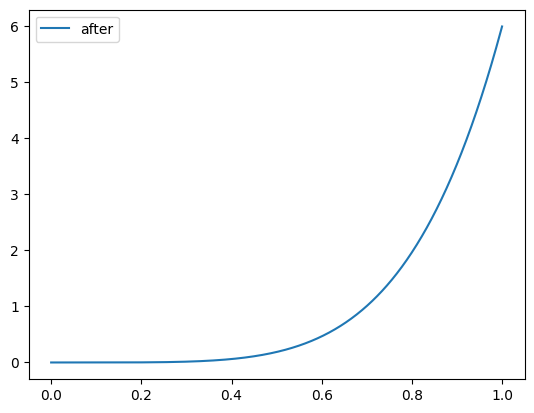

기댓값 :  0.8571428571428571


In [2]:
# 1번

before_alpha, before_beta = 1, 1 #베타분포에서 균등분포이기에 1로 설정
tripple, ttry = 5, 5

after_alpha = before_alpha + tripple
after_beta = before_beta + ttry - tripple

exp = after_alpha / (after_alpha + after_beta)

theta = np.linspace(0,1,1000)

plt.plot(theta, beta.pdf(theta, after_alpha, after_beta), label='after')
plt.legend()
plt.show()

exp = after_alpha / (before_alpha + after_alpha)
print('기댓값 : ', exp)

# 2번

In [3]:
# 2.a
P = np.array([[2/11, 2/11, 1/11],    # up -> up, flat, down
             [1/11, 0, 1/11],        # flat -> up, flat, down
             [2/11, 0, 0]])          # down -> up, flat, down

using_P = np.array([[P[0][0], P[0][0]+P[0][1], P[0][0]+P[0][1]+P[0][2]],   # up -> up, flat, down
                    [P[1][0], P[1][0]+P[1][1], P[1][0]+P[1][1]+P[1][2]],   # flat -> up, flat, down
                    [P[2][0], P[2][0]+P[2][1], P[2][0]+P[2][1]+P[2][2]]])  # down -> up, flat, down

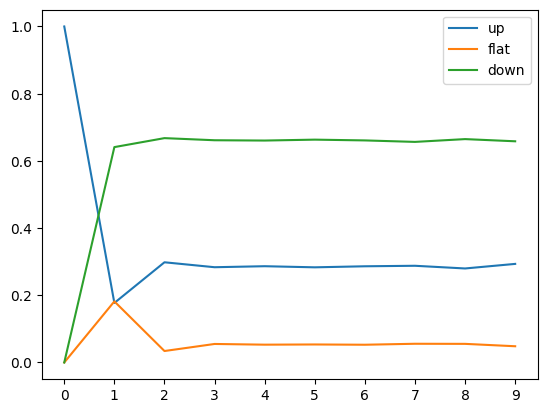

In [4]:
# # 2.b
nor_P = using_P / np.sum(using_P, axis = 1, keepdims = True)


def MC_P(N, P):
    ufd = ['1']  # 1 : up, 2 : flat, 3 : down
    for _ in range(N):
        current_state = ufd[-1]
        rd = random.uniform(0, 1)
        if current_state == '1':
            if rd <= nor_P[0][0]:
                next_state = '1'
            elif nor_P[0][0] < rd <= nor_P[0][1]:
                next_state = '2'
            else:
                next_state = '3'
        elif current_state == '2':
            if rd <= nor_P[1][0]:
                next_state = '1'
            elif nor_P[1][0] < rd <= nor_P[1][1]:
                next_state = '2'
            else:
                next_state = '3'
        else:  # current_state == '3'
            if rd <= nor_P[2][0]:
                next_state = '1'
            elif nor_P[2][0] < rd <= nor_P[2][1]:
                next_state = '2'
            else:
                next_state = '3'
        ufd.append(next_state)
    return ufd

# MC_P(5, nor_P)

tot_list = []
temp_list = []
for i in range(10000) :
    tot_list.append(MC_P(10, nor_P))
b = np.array(tot_list)
for i in range(0, 10) :
    temp_a = list(b[:, i])
    temp_list.append([temp_a.count('1')/10000, temp_a.count('2')/10000, temp_a.count('3')/10000])

graph = np.array(temp_list)
plt.plot(graph[:,0], label = 'up')
plt.plot(graph[:,1], label = 'flat')
plt.plot(graph[:,2], label = 'down')
plt.xticks(range(10))
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


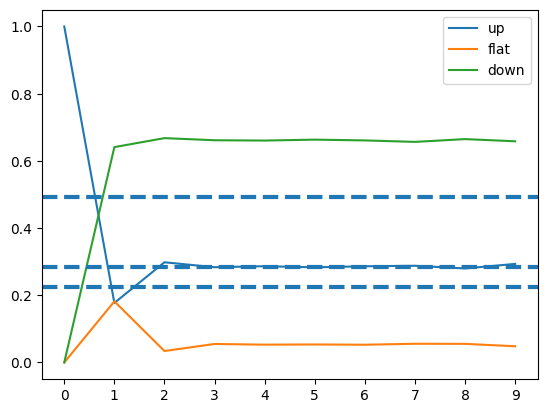

In [5]:
#2.c

value, vector = np.linalg.eig(np.transpose(P)) # 첫어레이는 고유값, 뒤에는 v1, v2,v3이다
v1 = vector[:, 0]

graph = np.array(temp_list)
plt.plot(graph[:,0], label = 'up')
plt.plot(graph[:,1], label = 'flat')
plt.plot(graph[:,2], label = 'down')
plt.axhline((v1[0] / np.sum(v1)), 0, 1, linestyle='--', linewidth = 3)
plt.axhline((v1[1] / np.sum(v1)), 0, 1, linestyle='--', linewidth = 3)
plt.axhline((v1[2] / np.sum(v1)), 0, 1, linestyle='--', linewidth = 3)
plt.xticks(range(10))
plt.legend()
plt.show()

# 3번

In [6]:
def p(x) :
    return 1 / np.sqrt(2 * np.pi) * np.exp(- x**2 / 2)

def q(x) :
    return 1 / np.sqrt(2 * np.pi) * np.exp(- (x-5)**2 / 2)

def g(x) :
    if x >= 5 :
        return 1
    else :
        return 0

N = 10000
x = np.random.normal(3, 1, N)
g_x = np.where(x > 3, 1, 0)
w_x = np.array([p(x) / q(x)])
np.sum(g_x * w_x) / N

0.006381185586179145

# 4번

In [7]:
def p(x) :
    return 0.3 * math.exp( -(1/2) * (( (x-(x-3)) / 1.5) ** 2)) + 0.7 * math.exp( -(1/2) * ( ((x-5) / 1.5) ** 2))

def alpha(x, x_star) :
    return min(1, (p(x_star) * q(x, x_star)) / (p(x) * q(x_star, x)))